<a href="https://colab.research.google.com/github/jdcerv/38610/blob/main/Modern_Programming_for_Data_Analytics_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern Programming for Data Analytics
Name: Jakob Cervenak

Andrew ID: jcervena

# Exercise - GeoIP
a. Install the package [ip2geotools](https://pypi.org/project/ip2geotools/) and [Faker](https://pypi.org/project/Faker/) using `pip`.

In [11]:
! pip install Faker
! pip install ip2geotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 843 kB 5.0 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
     |████████████████████████████████| 263 kB 44.1 MB/s 
     |████████████████████████████████| 985 kB 36.5 MB/s 
     |████████████████████████████████| 41 kB 208 kB/s 
     |████████████████████████████████| 57 kB 3.7 MB/s 
     |████████████████████████████████| 829 kB 39.8 MB/s 
     |████████████████████████████████| 330 kB 40.2 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 98 kB 8.4 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 507 kB 54.5 MB/s 
     |████████████████████████████████| 103 kB 44.6 MB/s 
    

b. Use `Faker` to generate a list of random [IPv4](https://faker.readthedocs.io/en/master/providers/faker.providers.internet.html#) addresses. Instructions to generate these random values can be found in the documentation.

**Hint**
* Set seed to `123`, i.e. 
```
seed = 123
Faker.seed( seed )
```

In [85]:
from faker import Faker
seed = 215
Faker.seed(seed)
fake = Faker()
IPlist = list()
for i in range(50):
      IPlist.append(fake.ipv4())
print(IPlist)


['85.23.4.45', '82.87.246.34', '112.163.83.221', '6.94.176.232', '135.86.195.5', '139.149.192.36', '120.245.105.211', '15.65.224.238', '175.119.167.231', '15.16.213.187', '154.65.6.5', '114.28.186.244', '158.154.89.38', '215.242.219.81', '77.219.18.249', '109.13.0.30', '78.206.113.92', '47.231.217.61', '123.125.113.40', '109.206.212.57', '87.252.41.49', '150.33.192.170', '8.124.28.174', '199.124.46.125', '191.225.6.190', '13.197.17.51', '196.164.166.250', '50.173.87.242', '87.110.51.222', '186.201.75.137', '172.88.178.144', '149.171.3.153', '69.172.221.82', '116.159.191.120', '2.61.59.64', '37.99.76.202', '52.247.103.105', '141.182.223.59', '162.194.109.239', '102.173.209.125', '191.144.34.168', '199.85.21.67', '100.56.25.246', '124.250.235.123', '121.35.26.144', '38.97.29.1', '163.77.97.29', '208.130.0.182', '154.182.88.105', '151.9.155.226']


c. Use `ip2geotools` to get information about the IPs. Use the method `get` from `DbIpCity`. Read the [documentation](https://pypi.org/project/ip2geotools/) on how to properly use the method. 

* The responses should be save to a list named `responses`.

**Hint**
* Set the `api_key` to `free`.
* Export the response from the get method to a JSON block using the method `to_json`.

In [90]:
from ip2geotools.databases.noncommercial import DbIpCity

responses = []

for i in range(50):
  responses.append(DbIpCity.get(IPlist[i], api_key='free').to_json())


print(len(responses))

50


d. Data cleanup. Some the responses have empty fields for `latitude` and `longitude`. Remove the entries from the list that are missing either of these values.

**Hint**
* If the latitude and longitude are missing, then the value of either of these is set to `None`.

In [92]:
import json
responses = [x for x in responses if json.loads(x).get('latitude') is not None and json.loads(x).get('longitude') is not None]
print(len(responses))

46


d. Save variables to disk. Use [pickle](https://docs.python.org/3/library/pickle.html) to serialize the variable `responses`. Save the pickle file to the course folder in your Google Drive in a file named `ips.pkl`. 

In [93]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

out = open('/content/drive/My Drive/38610/sir.pkl','wb')
pickle.dump(responses,out)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This section will make a plot using the data above but will fail for missing data. So make sure the data is clean. Nothing to do here.

**Hint**
* If the plot is printed, then you are good to do. Keep in mind the shape of `responses`: it is a list of strings that needs to converted to JSON.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


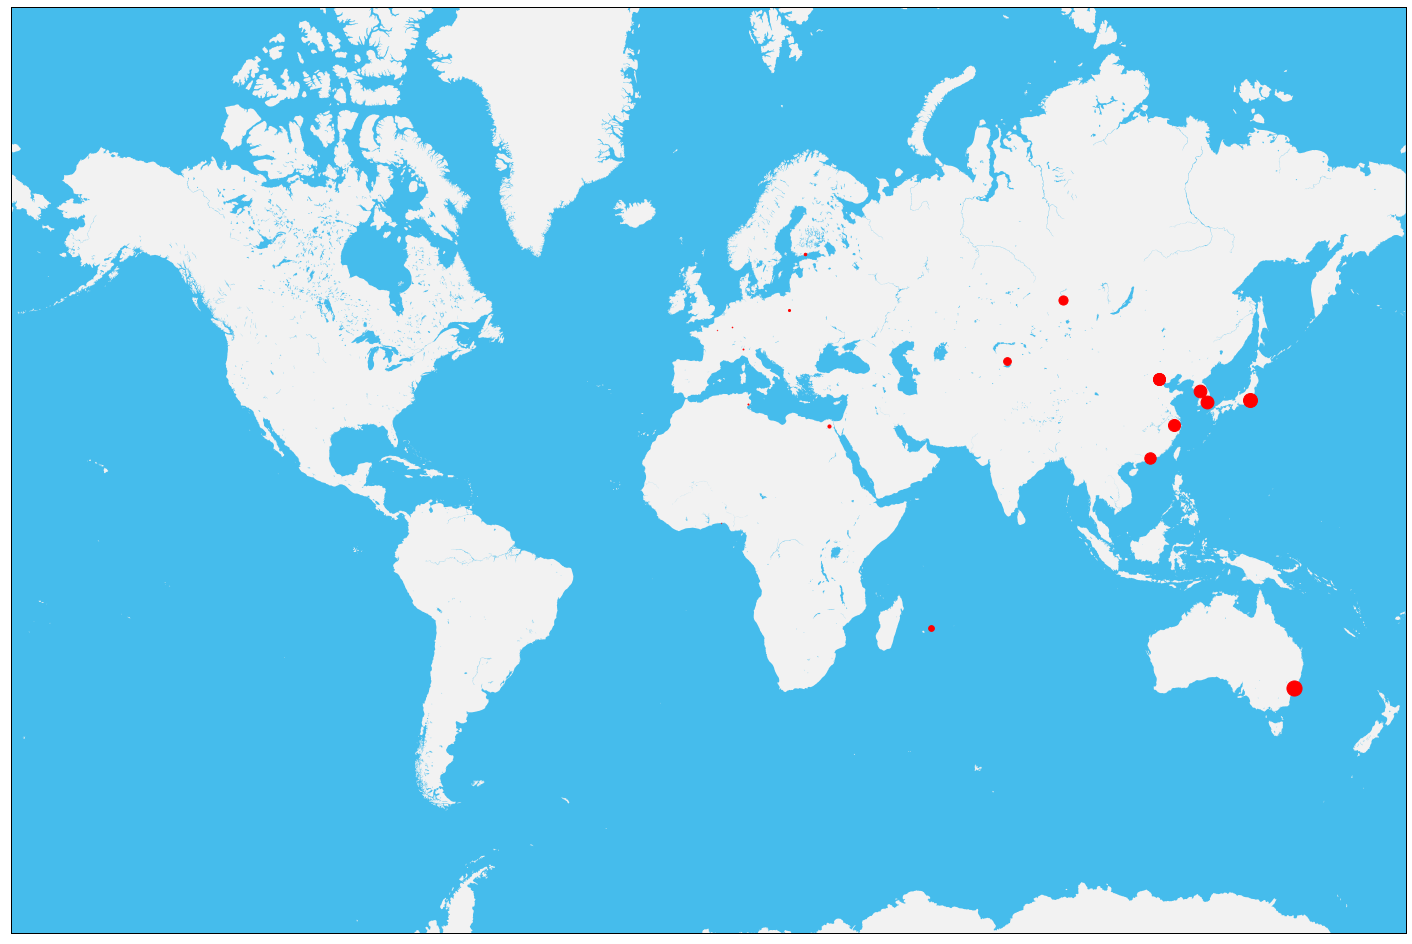

In [94]:
# DO NOT MODIFY THIS BLOCK
!pip install basemap
!pip install basemap-data-hires

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm
import math
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(25,25))
m = Basemap(resolution='i', # c, l, i, h, f or None
	projection='merc',
	lat_1=45.,lat_2=55,lat_0=50,lon_0=-107,
		llcrnrlon=-180, llcrnrlat=-70, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#45bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')

scale = 0.1
for response in responses:
    response = json.loads(response)

    if not response['longitude'] == None:
      lon = response['longitude']
      lat = response['latitude']
      markerSize = scale*response['longitude']
      x, y = m(lon,lat)
      plt.plot(x, y, markersize = markerSize, color = 'red', marker = 'o')

plt.show()

## Exercise - Random sampling
Numpy has a very robust library for sampling from random distributions. For a detailed list of discrete and continuous distributions that can be sampled from, see the [documentation](https://numpy.org/doc/stable/reference/random/index.html).

For example, sampling from an exponential distribution can be achieved with

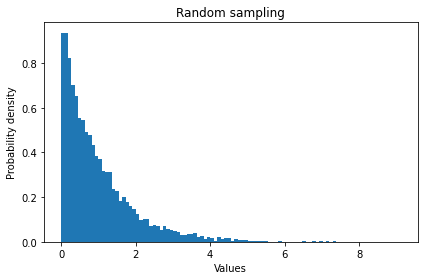

In [42]:
# DO NOT EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

#this line is sampling from an exponential distribution
elambda = 1
values = np.random.exponential(scale=elambda, size=10000)

num_bins = 100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(values, num_bins, density=True)
ax.set_xlabel('Values')
ax.set_ylabel('Probability density')
ax.set_title(r'Random sampling')
fig.tight_layout()

plt.show()

a. Inverse Transform Sampling. The inverse CDF method is a widely documented method for generating random samples.

In this exercise you will use this method to sample from an exponential distribution with parameter `lambda=1`.

Since this is a widely documented method, part of this exercise includes finding the method and implementing it yourself.

* Set `lambda=1`.
* Generate `10000` samples.
* Save the samples to a variable named `samples`.

**Hint**
* This is not complicated, you should be able to write this in a couple of lines.
* Feel free to use online resources like StackOverFlow.

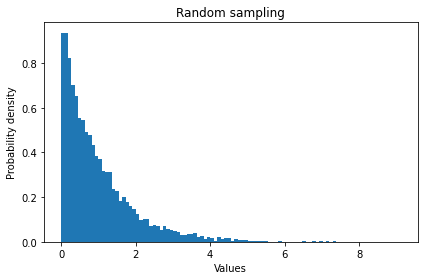

In [23]:
# INSERT CODE IN THIS CELL
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

elambda = 1
n = 10000
U = np.random.uniform(0,1,n)

samples = [-np.log(1-x)/elambda for x in U]


num_bins=100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(samples, num_bins, density=True)
ax.set_xlabel('Values')
ax.set_ylabel('Probability density')
ax.set_title(r'Random sampling')
fig.tight_layout()
plt.show()

# Exercise - SIR model
The SIR model is a simple mathematical model of epidemics. The entities in this model stand for

* (S)usceptible: inviduals that are not infected with the disease yet. However, they are not immune to it either, and so they can become infected with the disease in the future.
* (I)nfected or infectious: individuals that are infected with the disease and can transmit the disease to susceptible people.
* (R)ecovered: individuals who have recovered from the disease and are immune, so they can no longer be infected.

In the most basic form, this model model can be represented as

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c2a8fd2e93bfcf1092a44cfec7ef32c1a80a26f4" />

where 

* β is the average number of contacts per person per time
* γ is the probability a contagious person becoming non-contagious
* N is the population size (constant)

Consider the numerical solution below using the parameters

* `beta = 0.2`
* `gamma = 0.07`
* `N = 100`
* `S0 = 99`
* `I0 = 1`
* `R0 = 0`





In [2]:
# DO NOT MODIFY THIS BLOCK
!pip install numpy
!pip install scipy

import numpy as np
from scipy.integrate import odeint

# Model
def model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Parameters
N = 100
beta = 0.2
gamma = 0.07
S_0 = 99
I_0 = 1
R_0 = 0
t = np.linspace(0, 360, 360)

# Initial conditions vector
y0 = (S_0,I_0,R_0)

# Solve using ODE solver
results = odeint(model, y0, t, args=(N,beta,gamma))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Pretty plot
Use matplotlib and seaborn to make a figure. 

* The figure size should `25x25`
* The figure should have one plot with three lineplots, `t vs S`, `t vs I` and `t vs R`.
* Set title to `SIR model`.
* Set x-label to `Time (t)`.
* Set y-label to `Population size`.
* Make sure each line plot uses different colors.

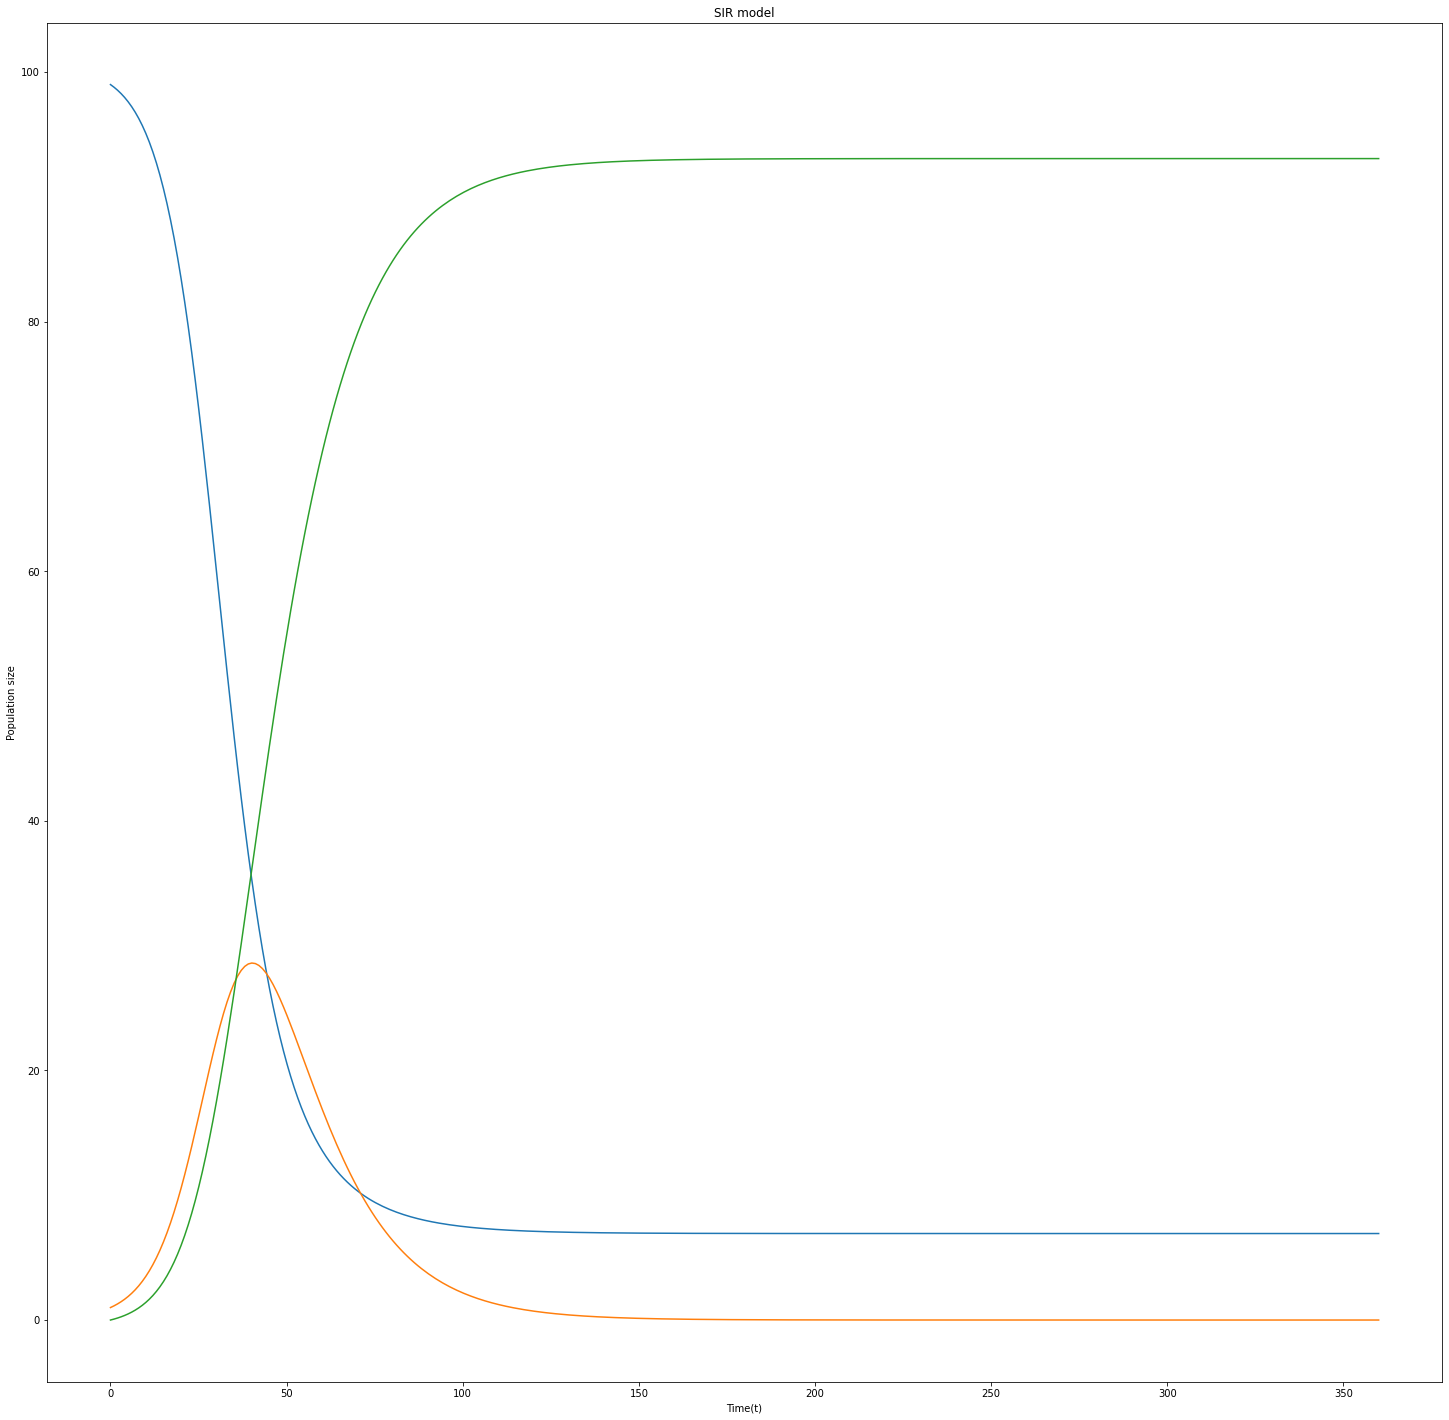

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(25, 25))
ax.plot(t,results)
ax.set_xlabel('Time(t)')
ax.set_ylabel('Population size')
ax.set_title(r'SIR model')

plt.show()

## Save plot to disk
Save the plot above to the course folder in your Google Drive to a file named `sir.png`. 

In [36]:
fig.savefig('sir.png')

# Exercise - Matrix multiplication using `numpy` (updated edition).

Design an implement a method called `can_be_multiplied`. 

* Use only the standard libary and `numpy`.
* This method takes two Numpy arrays and returns True if these two matrices can be multiplied. False, otherwise.
* Work on the assumption that if the input arguments are `a` and `b` (in that order), then the operation `a*b` will be checked by this method and not `b*a`.
* If the input argument is not a Numpy array, then the method should return `None`.
* **NEW**. If any of the arrays is a Numpy array, then check that the `dtype` of these arrays is numeric.
* **NEW**. If any of the arrays is empty, then issue a warning message letting the user know which of the arrays is empty.
* Write docstrings for this method.
* Write at least 6 assertions to test your method.

**Hint**
* Test for empty matrices. If any of the matrices are empty, then this method should return `False`.

In [95]:
import warnings
def can_be_multiplied(a,b):
  '''
  :param a:first given matrix
  :type: array
  :param b: second given matrix
  :type: array
  :answer: True or False 
  :test whether the matrices can be multiplied
  :checks to see if the entries are valid data types
  :it additional warns against empty arrays
  '''
  if not(isinstance(a,np.ndarray) and (isinstance(b,np.ndarray))):
    return None
  elif not(np.issubdtype(a.dtype,np.number) and np.issubdtype(b.dtype,np.number)):
      return False
  elif a.size == 0:
    warnings.warn('first entry is empty')
    return False
  elif b.size == 0:
    warnings.warn('second entry is empty')
    return False
  elif a.shape[1] == b.shape[0]:
    return True
  else:
    return False


a = np.arange(9).reshape(3,3)

b = np.arange(12).reshape(3,4)

c = np.arange(16).reshape(4,4)

d = np.arange(0)
e = np.array(['hello','snake','plate'], dtype=str)


x = 'yes'

assert can_be_multiplied(a,b) == True
assert can_be_multiplied(b,a) == False
assert can_be_multiplied(b,c) == True
assert can_be_multiplied(a,x) == None
assert can_be_multiplied(a,d) == False
assert can_be_multiplied(a,e) == False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: second entry is empty
